In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('/content/city_day.csv')

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
# print the number of rows and columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 29531
Number of columns: 16


In [ ]:
df = df.dropna(subset=['AQI'])

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
# Select the 'PM2.5' column for each city and fill the missing values with the mean value for that city
df['PM2.5']('City').fillna(df['PM2.5']('City').mean().round(2), inplace=True)


TypeError: ignored

#Feature Engineering


In [ ]:
df["year"]=df['Date'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date'].apply(lambda x:x.split("-")[1])
df["date"]=df['Date'].apply(lambda x:x.split("-")[2])

In [ ]:
df.drop('Date', axis = 1 , inplace = True)

#EDA

In [ ]:
df['PM2.5'].value_counts()

67.48     680
11.00      18
20.75      12
27.82      11
18.81      10
         ... 
116.33      1
103.45      1
98.07       1
100.82      1
24.38       1
Name: PM2.5, Length: 11542, dtype: int64

In [ ]:
# TOP 10  city which higest PM 2.5
df.groupby(['City']).count()['PM2.5']

City
Ahmedabad             1334
Aizawl                 111
Amaravati              841
Amritsar              1126
Bengaluru             1910
Bhopal                 278
Brajrajnagar           713
Chandigarh             299
Chennai               1884
Coimbatore             344
Delhi                 1999
Ernakulam              153
Gurugram              1453
Guwahati               495
Hyderabad             1880
Jaipur                1094
Jorapokhar             771
Kochi                  158
Kolkata                754
Lucknow               1893
Mumbai                 775
Patna                 1459
Shillong               205
Talcher                698
Thiruvananthapuram    1052
Visakhapatnam         1171
Name: PM2.5, dtype: int64

In [ ]:
print(df.isnull().sum())

City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
year              0
Month             0
date              0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   PM2.5       24850 non-null  float64
 2   PM10        24850 non-null  float64
 3   NO          24850 non-null  float64
 4   NO2         24850 non-null  float64
 5   NOx         24850 non-null  float64
 6   NH3         24850 non-null  float64
 7   CO          24850 non-null  float64
 8   SO2         24850 non-null  float64
 9   O3          24850 non-null  float64
 10  Benzene     21315 non-null  float64
 11  Toluene     19024 non-null  float64
 12  Xylene      9478 non-null   float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
 15  year        24850 non-null  object 
 16  Month       24850 non-null  object 
 17  date        24850 non-null  object 
dtypes: float64(13), object(5)
memory usage: 3.6+ MB


In [ ]:
df['PM2.5'].value_counts().index
d = df['PM2.5'].value_counts().values
O = df['City'].value_counts().index

([<matplotlib.patches.Wedge at 0x7fb8ea46ef70>,
 [Text(-1.011977398375583, 0.43116324655168214, 'Delhi'),
  Text(0.8174593444917972, -0.7360436264944092, 'Bengaluru'),
  Text(0.9002194017480206, -0.6321432026973288, 'Lucknow'),
  Text(0.9548354649982385, -0.5461586168702256, 'Chennai'),
  Text(0.9975618211602325, -0.4635411664172673, 'Hyderabad'),
  Text(1.0316266030786507, -0.3817676673323769, 'Patna'),
  Text(1.0590008904340231, -0.29751825836399726, 'Gurugram'),
  Text(1.0795071504638454, -0.2113393292726868, 'Ahmedabad'),
  Text(1.0930123921994577, -0.12378978349774597, 'Visakhapatnam'),
  Text(1.0992773811122665, -0.039865265268869333, 'Amritsar')],
 [Text(-0.551987671841227, 0.23517995266455388, '87.18%'),
  Text(0.4458869151773439, -0.4014783417242232, '2.31%'),
  Text(0.49102876458982936, -0.34480538328945204, '1.54%'),
  Text(0.5208193445444936, -0.29790470011103215, '1.41%'),
  Text(0.5441246297237631, -0.2528406362276003, '1.28%'),
  Text(0.5627054198610821, -0.2082369094540

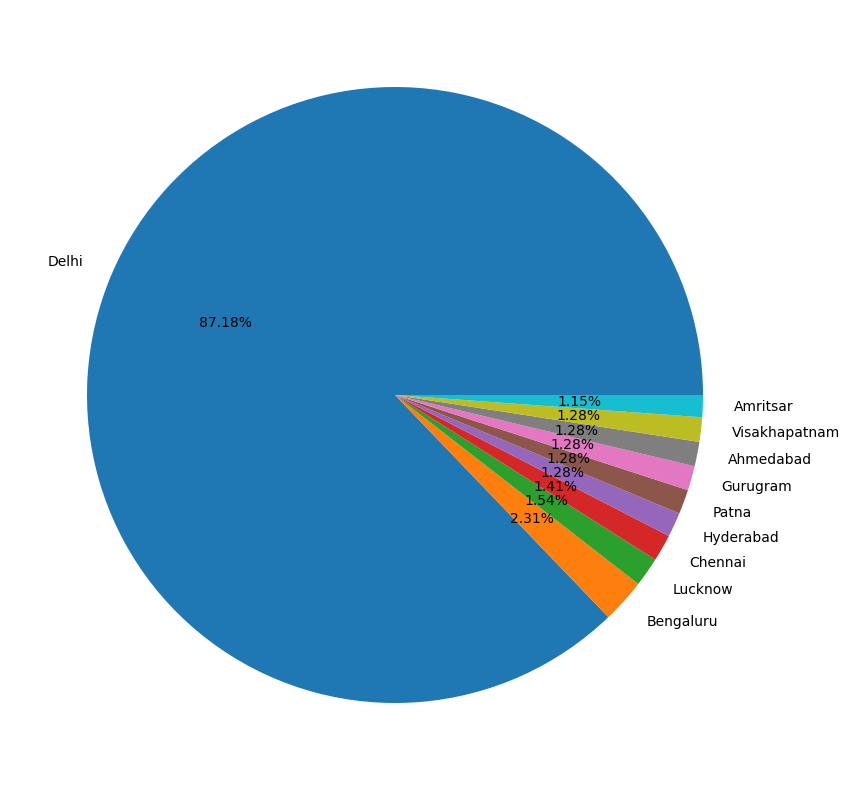

In [ ]:
# TOP 10 CITY HAS MOST AMUONT OF PM2.5
plt.figure(figsize = (20,10))
plt.pie(d[:10], labels = O[:10],autopct='%1.2f%%')

<Axes: xlabel='City', ylabel='PM10'>

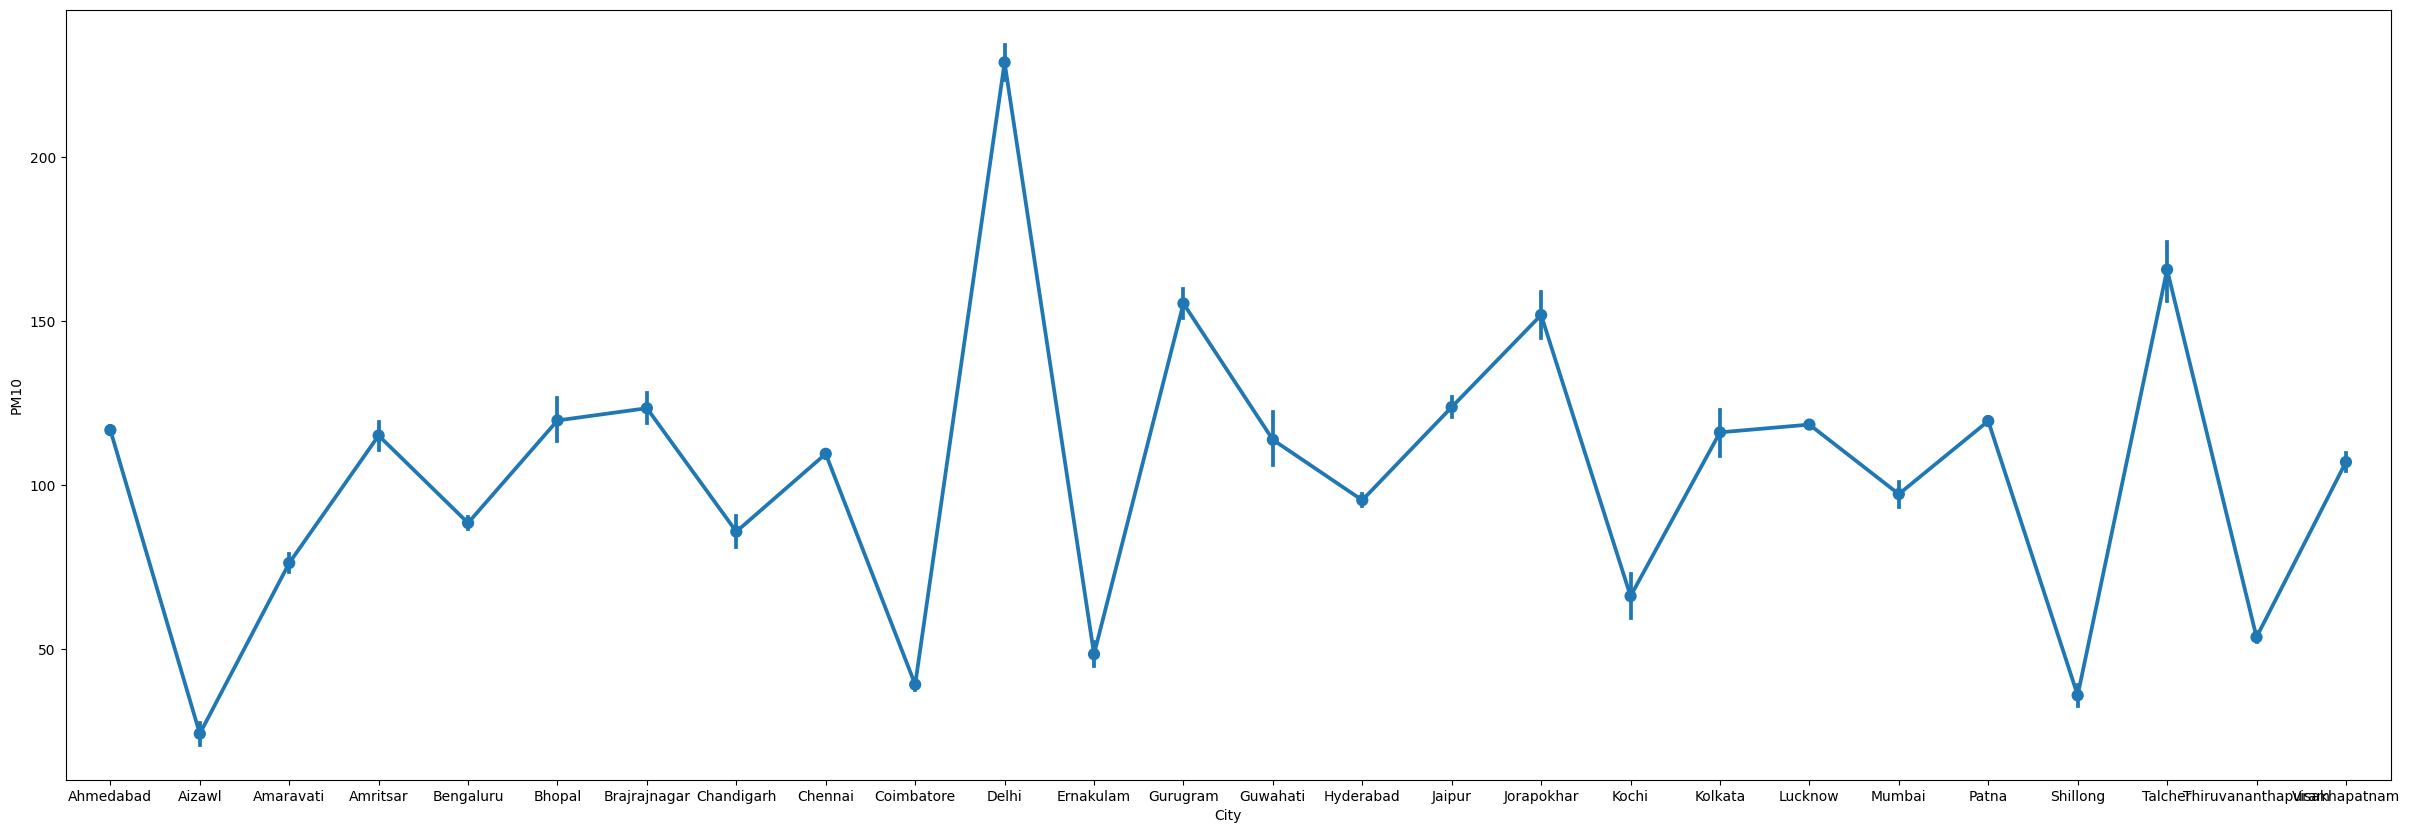

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,10))

sns.pointplot(x = 'City', y = 'PM10', data = df)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

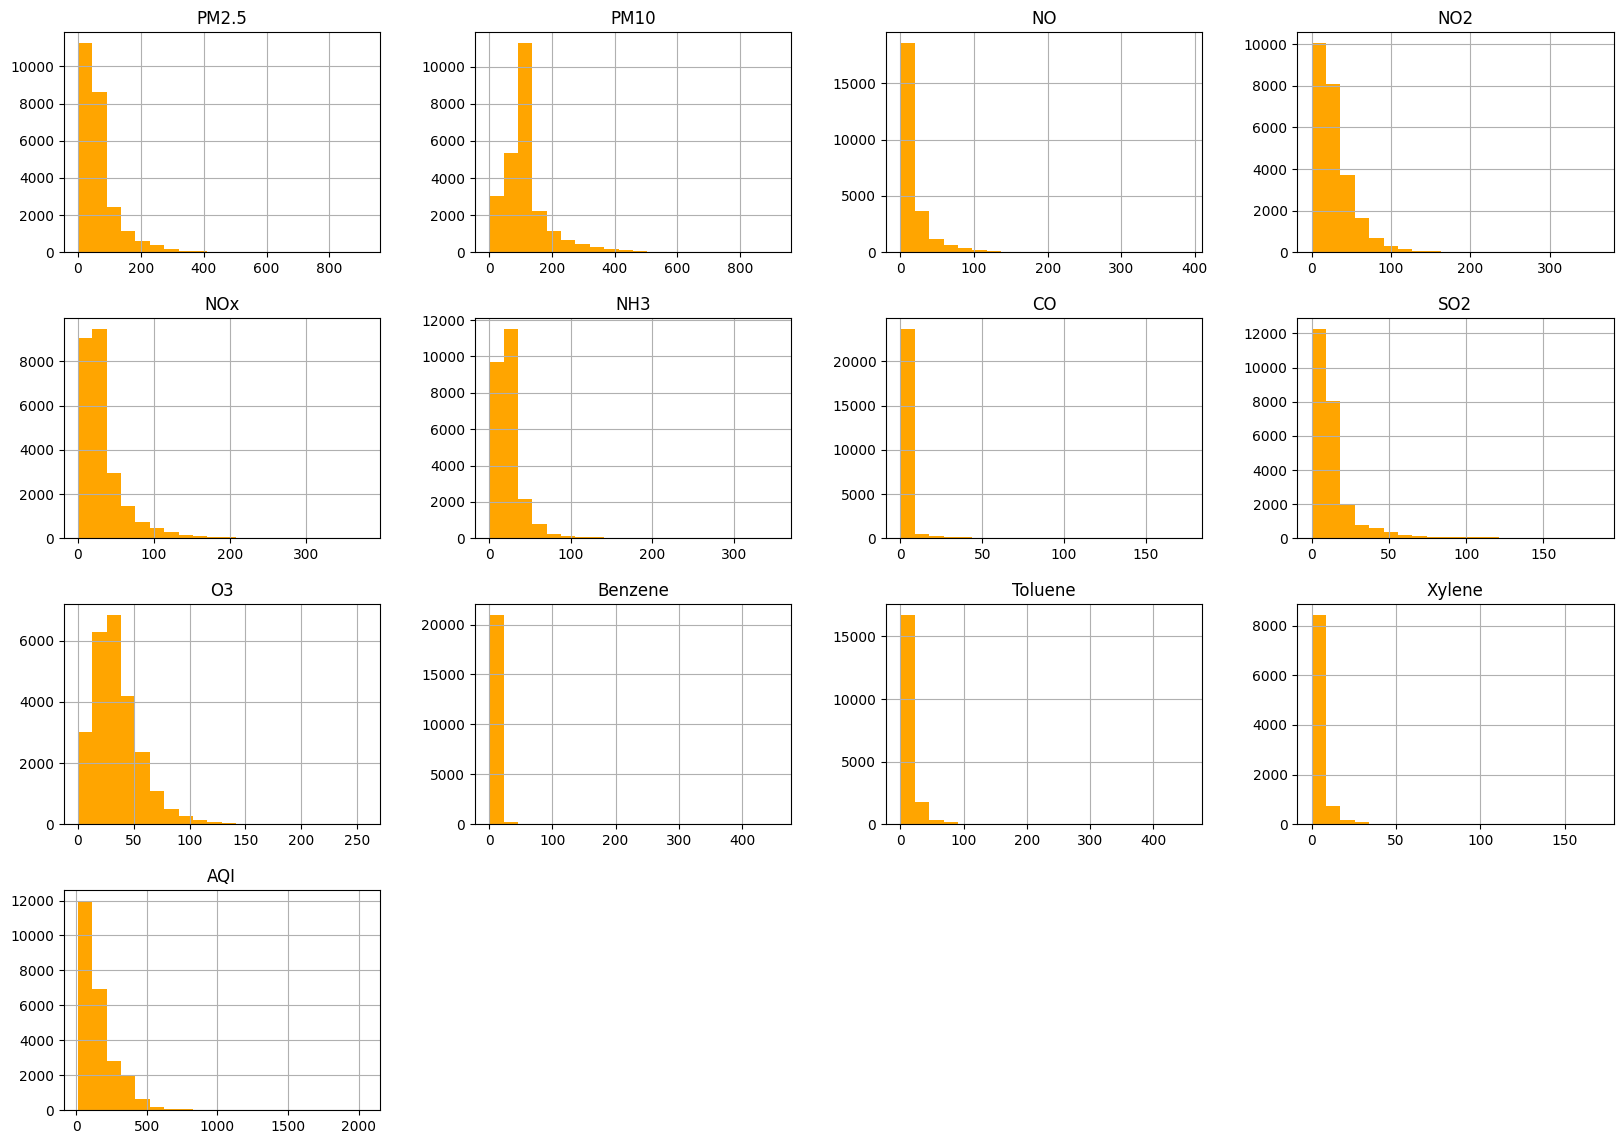

In [ ]:
# Distribution of the data
df.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [ ]:
#  Maximum and minimum NO  of each city
g = df.groupby(['City']).NO.agg([min, max]).reset_index()
g

,City,min,max
0,Ahmedabad,0.06,175.81
1,Aizawl,2.90,20.36
2,Amaravati,0.25,43.76
3,Amritsar,0.40,103.44
4,Bengaluru,0.46,95.19
5,Bhopal,0.59,30.94
6,Brajrajnagar,0.03,390.68
7,Chandigarh,0.44,70.94
8,Chennai,1.76,59.44
9,Coimbatore,0.19,87.90


<Axes: xlabel='City', ylabel='max'>

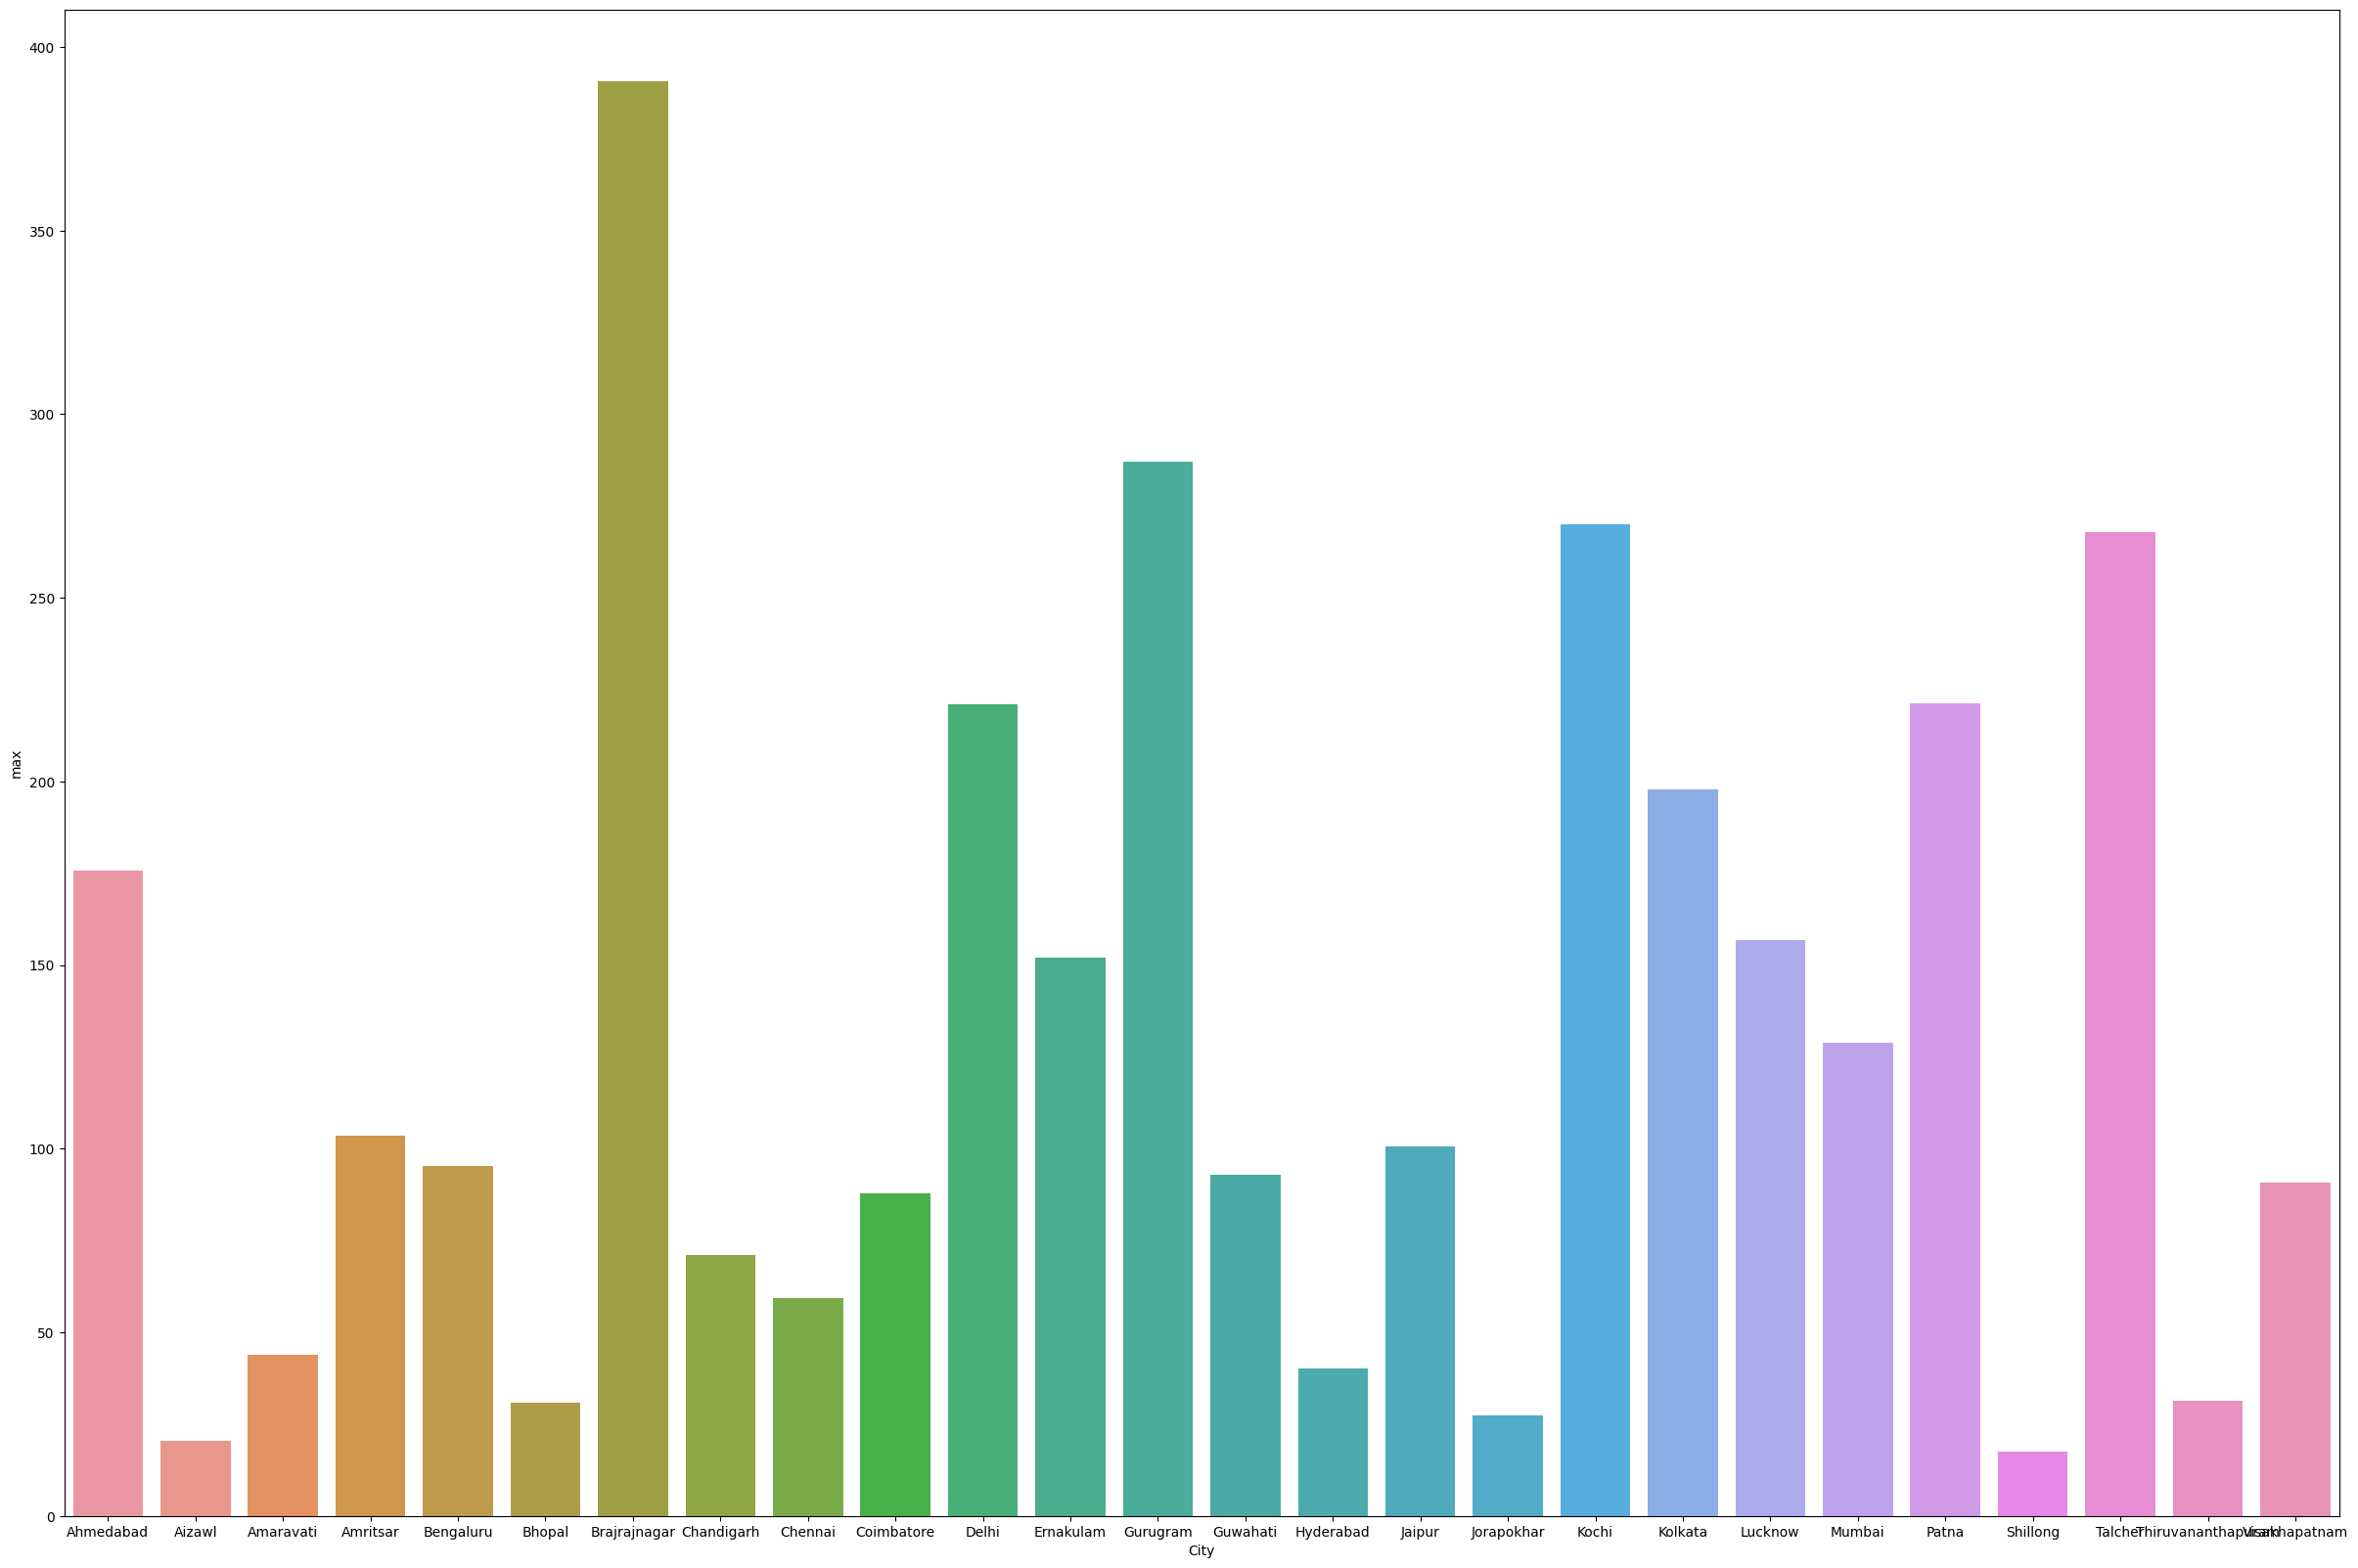

In [ ]:
# maximum NO in city
plt.figure(figsize = (30,20))
sns.barplot(x = 'City' , y = 'max', data = g)

In [ ]:
# Average NO yearwise
g = df.groupby(['year']).NO.agg(['mean']).reset_index()
g

,year,mean
0,2015,16.869124
1,2016,19.796001
2,2017,17.932653
3,2018,18.834102
4,2019,16.477375
5,2020,16.704162


In [ ]:
# aveage AOI in every city
o  = df.groupby(['City']).AQI.agg(['mean']).reset_index()
o.head(10)

,City,mean
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


In [ ]:
# maximum AQI of every city on each year
v = df.groupby(['City', 'year']).AQI.agg([max]).reset_index()
v

,City,year,max
0,Ahmedabad,2015,1247.0
1,Ahmedabad,2016,1842.0
2,Ahmedabad,2017,1747.0
3,Ahmedabad,2018,2049.0
4,Ahmedabad,2019,1719.0
...,...,...,...
93,Visakhapatnam,2016,188.0
94,Visakhapatnam,2017,296.0
95,Visakhapatnam,2018,387.0
96,Visakhapatnam,2019,343.0


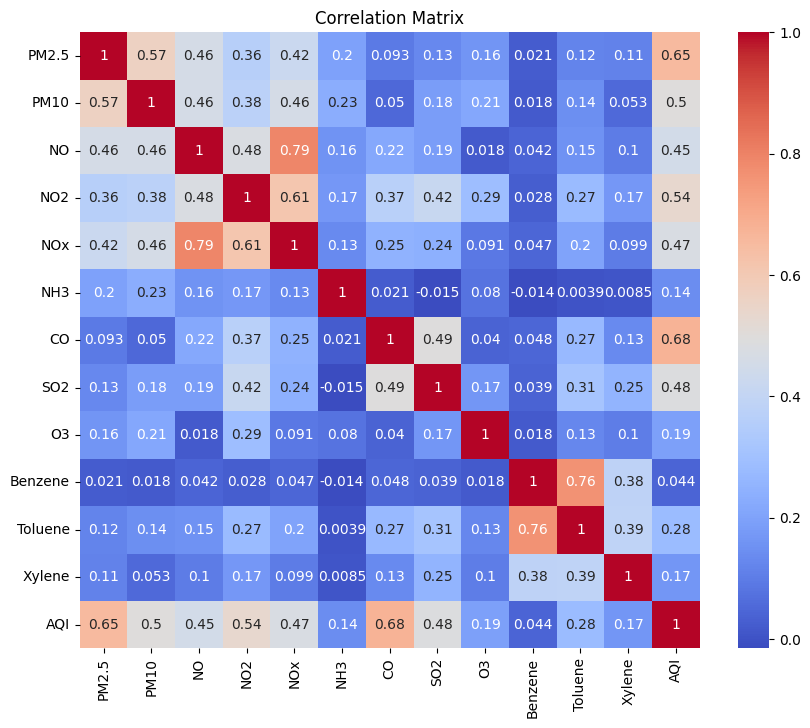

In [ ]:
# Select the numerical columns
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


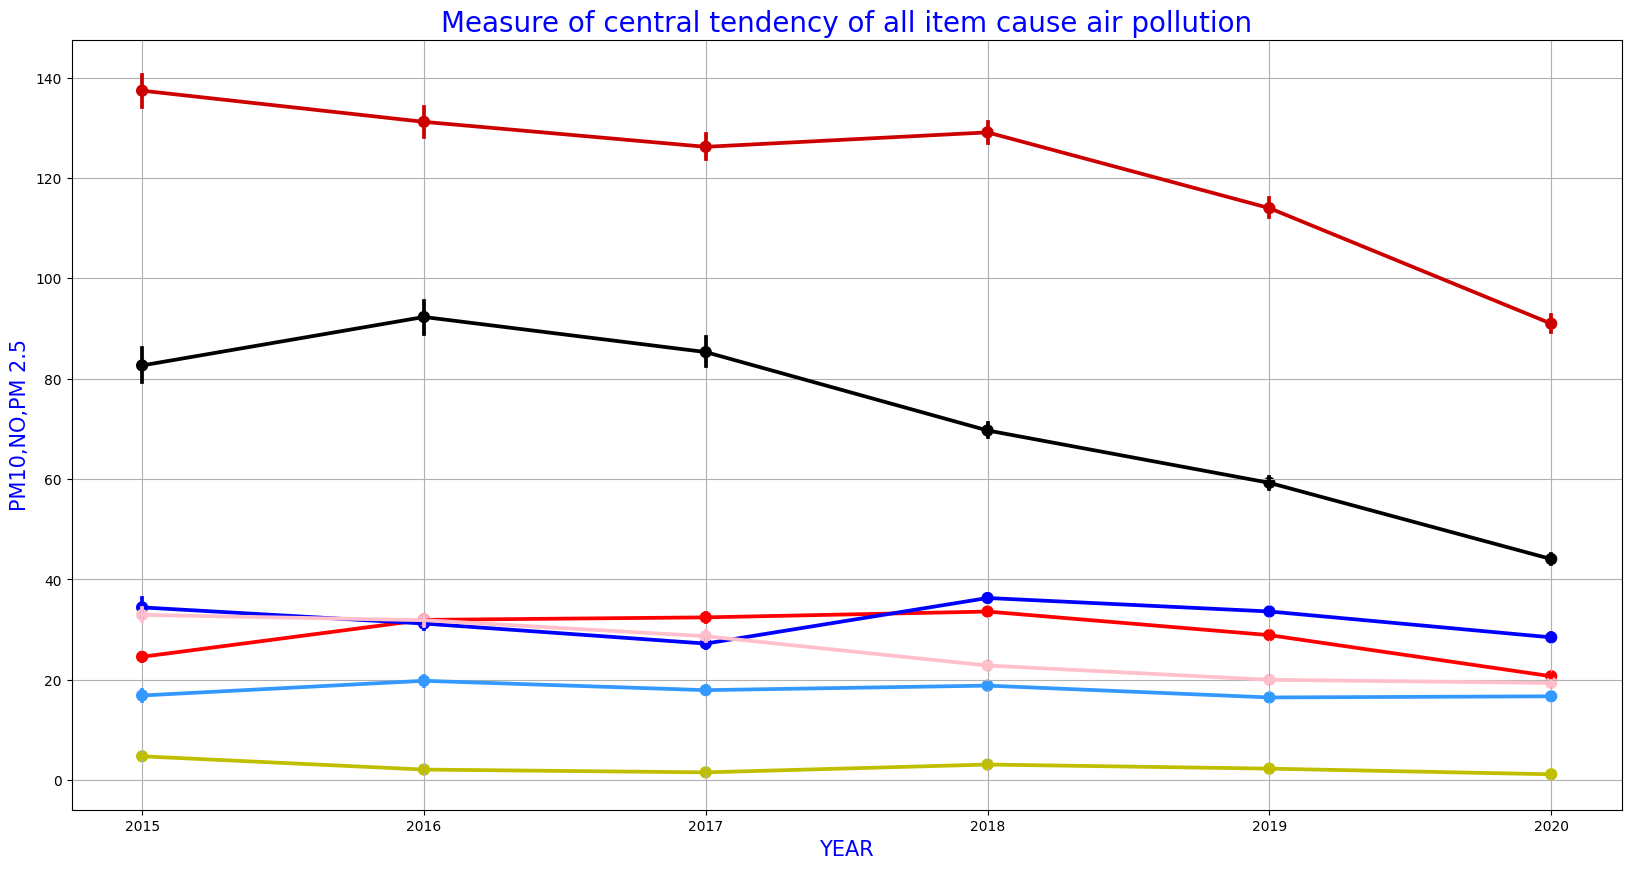

In [ ]:
plt.subplots(figsize =(20,10))

sns.pointplot(x='year',y='PM2.5',data=df,color='black',label='PM2.5')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='PM10',data=df,color='#CC0000')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NO',data=df,color='#3399FF')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NO2',data=df,color='red')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NOx',data=df,color='b')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='CO',data=df,color='y')
plt.plot(alpha=0.8)
sns.pointplot(x='year',y='NH3',data=df,color='pink')
plt.plot(alpha=0.8)

plt.xlabel('YEAR',fontsize = 15,color='blue')
plt.ylabel('PM10,NO,PM 2.5',fontsize = 15,color='blue')
plt.title('Measure of central tendency of all item cause air pollution',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
df.columns


Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'year', 'Month',
       'date'],
      dtype='object')

In [ ]:
# Next, we can engineer some new features based on the existing ones
df['PM_ratio'] = df['PM2.5'] / df['PM10']
df['NOx_ratio'] = df['NOx'] / (df['NO'] + df['NO2'] + df['NOx'])
df['CO_SO2'] = df['CO'] * df['SO2']
df['Toluene_Xylene'] = df['Toluene'] + df['Xylene']

In [ ]:
# Drop irrelevant columns
df.drop(['City', 'AQI_Bucket', 'date'], axis=1, inplace=True)


#Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X = df.drop(['AQI'], axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply StandardScaler to the training and testing sets
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Model Building

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Make predictions for training and testing sets
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_lr = mean_absolute_error(y_train, y_train_pred)
train_mse_lr = mean_squared_error(y_train, y_train_pred)
train_r2_lr = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_lr = mean_absolute_error(y_test, y_test_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)
test_r2_lr = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_lr)
print('MAE:', train_mae_lr)
print('MSE:', train_rmse_lr)
print('R2 Score:',train_r2_lr)

print('\nTesting scores:')
print('RMSE:', test_rmse_lr)
print('MAE:', test_mae_lr)
print('MSE:', test_mse_lr)
print('R2 Score:',test_r2_lr)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
# Evaluate the model on both training and testing datasets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_rf = mean_absolute_error(y_train, y_train_pred)
train_mse_rf = mean_squared_error(y_train, y_train_pred)
train_r2_rf = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_rf= mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_rf= mean_absolute_error(y_test, y_test_pred)
test_mse_rf = mean_squared_error(y_test, y_test_pred)
test_r2_rf = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_rf)
print('MAE:', train_mae_rf)
print('MSE:', train_mse_rf)
print('R2 Score:',train_r2_rf)

print('\nTesting scores:')
print('RMSE:', test_rmse_rf)
print('MAE:', test_mae_rf)
print('MSE:', test_mse_rf)
print('R2 Score:',test_r2_rf)


Training scores:
RMSE: 18.662432617637286
MAE: 7.4452926090141
MSE: 348.28639120785215
R2 Score: 0.982689683198205

Testing scores:
RMSE: 40.854794140388044
MAE: 19.416577895182897
MSE: 1669.1142042534855
R2 Score: 0.9023373345533815


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create the classifier
clf = DecisionTreeRegressor()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate RMSE, MAE, and MSE for training set
train_rmse_clf = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_clf = mean_absolute_error(y_train, y_train_pred)
train_mse_clf = mean_squared_error(y_train, y_train_pred)
train_r2_clf = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, and MSE for testing set
test_rmse_clf = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_clf= mean_absolute_error(y_test, y_test_pred)
test_mse_clf = mean_squared_error(y_test, y_test_pred)
test_r2_clf = r2_score(y_test, y_test_pred)
# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_clf)
print('MAE:', train_mae_clf)
print('MSE:', train_mse_clf)
print('R2 Score:',train_r2_clf)

print('\nTesting scores:')
print('RMSE:', test_rmse_clf)
print('MAE:', test_mae_clf)
print('MSE:', test_mse_clf)
print('R2 Score:',test_r2_clf)



Training scores:
RMSE: 1.3501546231985162
MAE: 0.04032487811695397
MSE: 1.822917506544327
R2 Score: 0.9999093984710905

Testing scores:
RMSE: 68.65347380623396
MAE: 27.90852190433196
MSE: 4713.299465663254
R2 Score: 0.7242169602944142


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a gradient boosting model
gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train, y_train)


# Make predictions on training and testing data
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Calculate RMSE, MAE, MSE, and R2 score for training set
train_rmse_gb = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae_gb = mean_absolute_error(y_train, y_train_pred)
train_mse_gb = mean_squared_error(y_train, y_train_pred)
train_r2_gb = r2_score(y_train, y_train_pred)

# Calculate RMSE, MAE, MSE, and R2 score for testing set
test_rmse_gb = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_gb = mean_absolute_error(y_test, y_test_pred)
test_mse_gb = mean_squared_error(y_test, y_test_pred)
test_r2_gb = r2_score(y_test, y_test_pred)

# Print the scores
print('Training scores:')
print('RMSE:', train_rmse_gb)
print('MAE:', train_mae_gb)
print('MSE:', train_mse_gb)
print('R2 Score:',train_r2_gb)

print('\nTesting scores:')
print('RMSE:', test_rmse_gb)
print('MAE:', test_mae_gb)
print('MSE:', test_mse_gb)
print('R2 Score:',test_r2_gb)

Training scores:
RMSE: 9.99174388508624
MAE: 7.02152339221436
MSE: 99.83494586515826
R2 Score: 0.995038064694912

Testing scores:
RMSE: 40.46580220074168
MAE: 19.610239960414397
MSE: 1637.4811477495502
R2 Score: 0.9041882376291117


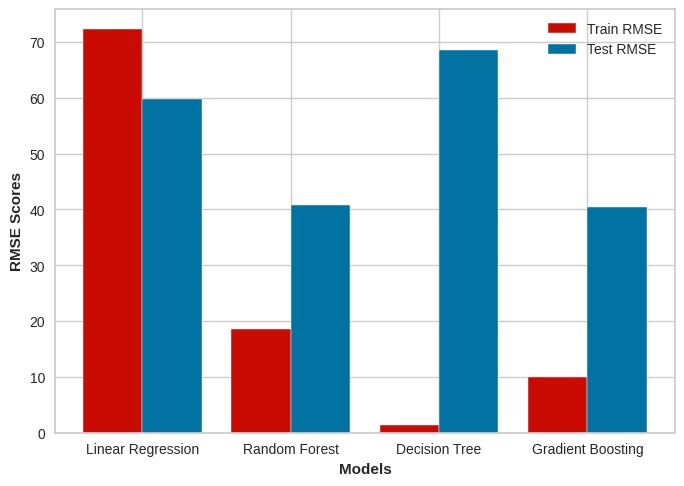

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of scores for each model
train_scores = [train_rmse_lr, train_rmse_rf, train_rmse_clf, train_rmse_gb]
test_scores = [test_rmse_lr, test_rmse_rf, test_rmse_clf, test_rmse_gb]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train and test RMSE scores
plt.bar(r1, train_scores, color='r', width=barWidth, edgecolor='white', label='Train RMSE')
plt.bar(r1+barWidth, test_scores, color='b', width=barWidth, edgecolor='white', label='Test RMSE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks(r1+barWidth/2, models)

# Set the y-axis label
plt.ylabel('RMSE Scores', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()

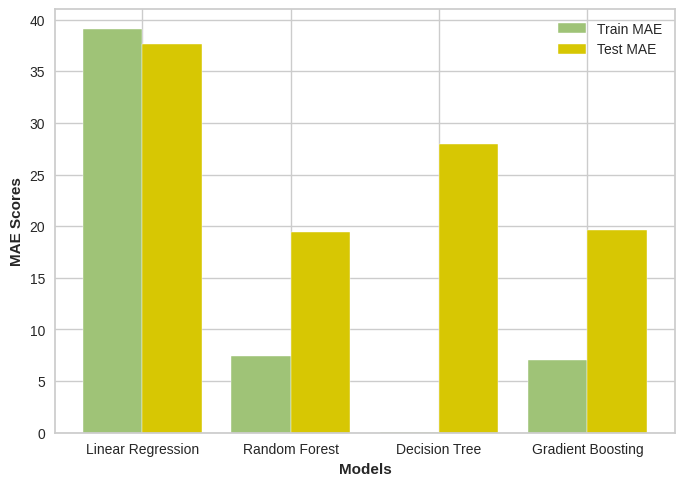

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of scores for each model
train_scores = [train_mae_lr, train_mae_rf, train_mae_clf, train_mae_gb]
test_scores = [test_mae_lr, test_mae_rf, test_mae_clf, test_mae_gb]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train and test MAE scores
plt.bar(r1, train_scores, color='g', width=barWidth, edgecolor='white', label='Train MAE')
plt.bar(r1+barWidth, test_scores, color='y', width=barWidth, edgecolor='white', label='Test MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks(r1+barWidth/2, models)

# Set the y-axis label
plt.ylabel('MAE Scores', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


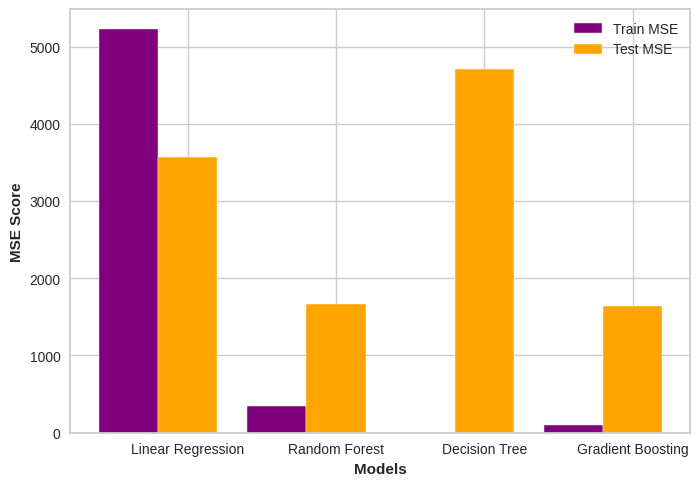

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of scores for each model
train_mse_scores = [train_mse_lr, train_mse_rf, train_mse_clf, train_mse_gb]
test_mse_scores = [test_mse_lr, test_mse_rf, test_mse_clf, test_mse_gb]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train MSE scores
plt.bar(r1, train_mse_scores, color='purple', width=barWidth, edgecolor='white', label='Train MSE')

# Create the bar plot for test MSE scores
plt.bar(r1 + barWidth, test_mse_scores, color='orange', width=barWidth, edgecolor='white', label='Test MSE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Set the y-axis label
plt.ylabel('MSE Score', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


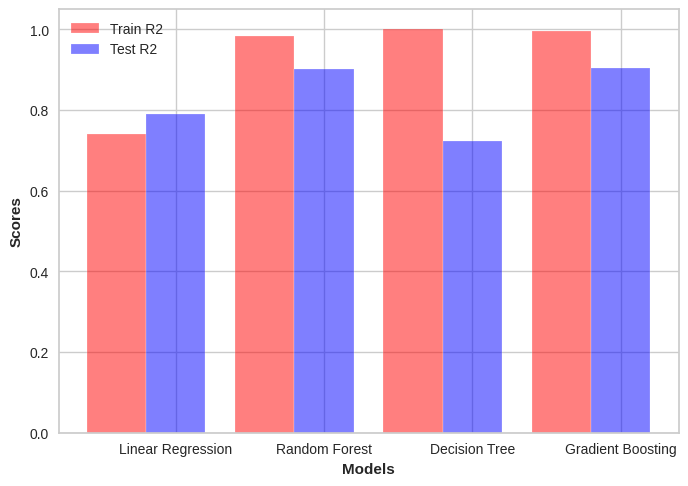

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of model names
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

# Create a list of scores for each model
train_scores = [train_r2_lr, train_r2_rf, train_r2_clf, train_r2_gb]
test_scores = [test_r2_lr, test_r2_rf, test_r2_clf, test_r2_gb]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))

# Set the width of the bars
barWidth = 0.4

# Create the bar plot for train and test R2 scores
plt.bar(r1, train_scores, color='red', width=barWidth, edgecolor='white', label='Train R2', alpha=0.5)
plt.bar(r1 + barWidth, test_scores, color='blue', width=barWidth, edgecolor='white', label='Test R2', alpha=0.5)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Set the y-axis label
plt.ylabel('Scores', fontweight='bold')

# Add the legend
plt.legend()

# Show the plot
plt.show()


Pycaret

In [ ]:
from pycaret.regression import *
import pandas as pd

# initialize setup with GPU support
exp_reg = setup(df, target = 'AQI', session_id=42, use_gpu=True)

# compare all models and select the best one
best_model = compare_models()




,Description,Value
0,Session id,42
1,Target,AQI
2,Target type,Regression
3,Original data shape,"(29531, 19)"
4,Transformed data shape,"(29531, 35)"
5,Transformed train set shape,"(20671, 35)"
6,Transformed test set shape,"(8860, 35)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19.3556,2222.8291,46.8932,0.8877,0.1861,0.1239,2.7820
lightgbm,Light Gradient Boosting Machine,22.5179,2504.7866,49.8449,0.8750,0.2172,0.1565,0.2840
rf,Random Forest Regressor,20.3129,2529.5851,49.9712,0.8740,0.1946,0.1305,1.4790
gbr,Gradient Boosting Regressor,26.8385,3069.9885,55.2031,0.8470,0.2586,0.2003,0.2210
knn,K Neighbors Regressor,23.8365,3498.6932,58.5453,0.8265,0.2237,0.1505,0.8910
dt,Decision Tree Regressor,27.7172,4475.6058,66.1194,0.7766,0.2633,0.1763,0.1740
ridge,Ridge Regression,39.3184,5290.8026,72.5545,0.7349,0.3410,0.2912,0.2110
br,Bayesian Ridge,39.2510,5291.2914,72.5578,0.7349,0.3390,0.2901,0.8750
lr,Linear Regression,39.3321,5291.3115,72.5586,0.7348,0.3412,0.2914,0.3890
en,Elastic Net,39.3275,5382.1616,73.1869,0.7303,0.3363,0.2904,0.1810


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

#HyperParameter Tunning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

# Create a decision tree model
dt = DecisionTreeRegressor()

# Create a grid search object to search over the hyperparameter grid
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Training score:", grid_search.best_score_)

# Evaluate the model on the testing data
print("Testing score:", grid_search.score(X_test, y_test))

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Training score: 0.8162623159503022
Testing score: 0.7893540869609392


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
print('Training score:', best_model.score(X_train, y_train))
print('Testing score:', best_model.score(X_test, y_test))

#Model Deployement

In [ ]:
import pickle
pickle_out = open('rf.pkl','wb')
pickle.dump(rf,pickle_out)
pickle_out.close()

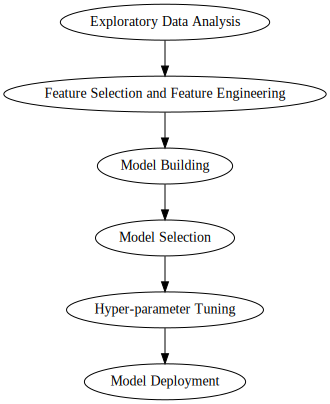

In [ ]:
import graphviz

# Create a new directed graph
graph = graphviz.Digraph()

# Add nodes for each step
graph.node('EDA', 'Exploratory Data Analysis')
graph.node('FSFE', 'Feature Selection and Feature Engineering')
graph.node('MB', 'Model Building')
graph.node('MS', 'Model Selection')
graph.node('HT', 'Hyper-parameter Tuning')
graph.node('MD', 'Model Deployment')

# Add edges between the nodes
graph.edge('EDA', 'FSFE')
graph.edge('FSFE', 'MB')
graph.edge('MB', 'MS')
graph.edge('MS', 'HT')
graph.edge('HT', 'MD')

# Display the graph
graph
